# **Tutorial 2 Forecasting**



*   SVM/SVR
*   ARIMA

## **Support Vector Machine**

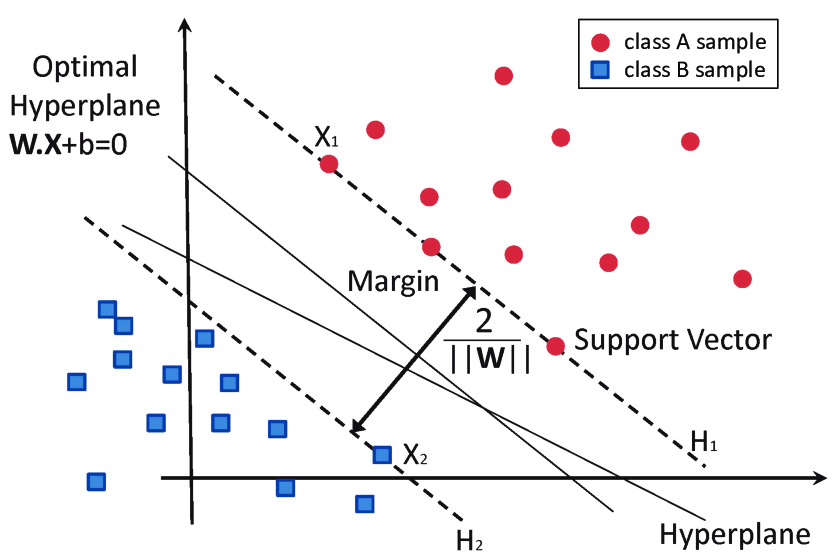

Support Vector Machine (SVM) adalah metode machine learning yang bersifat supervised, dimana model akan mencari garis yang membagi kedua kelas secara optimal.

Mirip dengan logistic regression, dimana logreg merupakan pendekatan secara probabilistik, SVM menggunakan pendekatan secara statistik.

Bisa terdapat garis sebanyak tak hingga yang membagi kelas, namun SVM akan mencari margin maksimal di antara semua garis (jarak maksimal antara kedua kelas)

Juga terdapat dua tipe SVM:

1. Linear SVM, yakni ketika data yang dapat terbagi linear secara sempurna, yang berarti titik data dapat diklasifikasikan menjadi 2 kelas dengan sebuah garis lurus.
2. Non-Linear SVM, yakni ketika data tidak dapat dipisahkan secara linear, dimana kita dapat menggunakan kernel untuk memecahkan masalah-masalah tersebut.

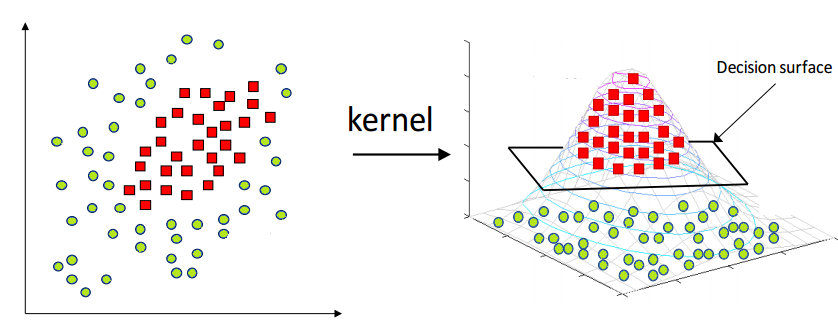

Support Vector Regression (SVR) adalah teknik yang berguna dalam memodelkan hubungan antara variabel independen dan variabel dependen untuk tugas regresi. Di Indonesia, seperti di banyak negara lainnya, SVR dapat digunakan untuk berbagai keperluan di bidang analisis data dan prediksi, terutama dalam konteks ekonomi, keuangan, industri, dan sains.

Berikut adalah beberapa manfaat dan aplikasi SVR di Indonesia:
*   Prediksi Harga Saham: SVR dapat digunakan untuk memprediksi pergerakan harga saham berdasarkan data historis, variabel ekonomi, atau faktor lainnya.
*   Prediksi Permintaan: Dalam industri, SVR bisa digunakan untuk meramalkan permintaan produk tertentu, membantu perencanaan produksi dan distribusi.
*  Prediksi pada Riset Medis: Digunakan dalam penelitian medis untuk memprediksi pola penyakit, respons terhadap pengobatan, atau peramalan tren kesehatan.






### Load Library

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install statsmodels

In [ ]:
import sklearn.metrics as sm
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing
from sklearn.utils import shuffle
from sklearn.svm import SVR

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

#### Load Dataset

In [ ]:
# Fetch the dataset and limit the number of samples
num_samples_to_keep = 100
housing.data = housing.data[:num_samples_to_keep]
housing.target = housing.target[:num_samples_to_keep]

In [ ]:
housing.target

array([4.526  , 3.585  , 3.521  , 3.413  , 3.422  , 2.697  , 2.992  ,
       2.414  , 2.267  , 2.611  , 2.815  , 2.418  , 2.135  , 1.913  ,
       1.592  , 1.4    , 1.525  , 1.555  , 1.587  , 1.629  , 1.475  ,
       1.598  , 1.139  , 0.997  , 1.326  , 1.075  , 0.938  , 1.055  ,
       1.089  , 1.32   , 1.223  , 1.152  , 1.104  , 1.049  , 1.097  ,
       0.972  , 1.045  , 1.039  , 1.914  , 1.76   , 1.554  , 1.5    ,
       1.188  , 1.888  , 1.844  , 1.823  , 1.425  , 1.375  , 1.875  ,
       1.125  , 1.719  , 0.938  , 0.975  , 1.042  , 0.875  , 0.831  ,
       0.875  , 0.853  , 0.803  , 0.6    , 0.757  , 0.75   , 0.861  ,
       0.761  , 0.735  , 0.784  , 0.844  , 0.813  , 0.85   , 1.292  ,
       0.825  , 0.952  , 0.75   , 0.675  , 1.375  , 1.775  , 1.021  ,
       1.083  , 1.125  , 1.313  , 1.625  , 1.125  , 1.125  , 1.375  ,
       1.188  , 0.982  , 1.188  , 1.625  , 1.375  , 5.00001, 1.625  ,
       1.375  , 1.625  , 1.875  , 1.792  , 1.3    , 1.838  , 1.25   ,
       1.7    , 1.93

In [ ]:
X, y = shuffle(housing.data, housing.target, random_state=3)

#### Train, Predict, Plot, and Evaluating

In [ ]:
# Split the data into training and testing sets
housing_train = int(0.8 * len(y))
X_train, y_train = X[:housing_train], y[:housing_train]
X_test, y_test = X[housing_train:], y[housing_train:]

In [ ]:
# Display results
lengths = {
    'X_train': len(X_train),
    'y_train': len(y_train),
    'X_test': len(X_test),
    'y_test': len(y_test)
}

# Convert lengths to a Pandas DataFrame
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)


         Length
X_train      80
y_train      80
X_test       20
y_test       20


In [ ]:
# Define the parameter grid for GridSearchCV
#param_grid = {
#    'C': [0.01, 0.1, 1, 10, 100],
#    'epsilon': [0.01, 0.1, 1, 10, 100],
#    'kernel': ['linear', 'rbf']
#}

In [ ]:
#regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)
#regressor.fit(X_train, y_train)
#y_pred = regressor.predict(X_test)

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1,],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, refit=True, verbose=3, cv=3)

In [ ]:
# Fit the model with the best parameters
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=-0.074 total time=   0.2s
[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.181 total time=   0.1s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.039 total time=   0.1s
[CV 1/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.242 total time=   0.0s
[CV 2/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 3/3] END .C=0.01, epsilon=0.01, kernel=rbf;, score=-0.110 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=0.1, kernel=linear;, score=-0.045 total time=   0.3s
[CV 2/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.164 total time=   0.1s
[CV 3/3] END C=0.01, epsilon=0.1, kernel=linear;, score=-0.014 total time=   0.1s
[CV 1/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.201 total time=   0.0s
[CV 2/3] END ..C=0.01, epsilon=0.1, kernel=rbf;, score=-0.007 total time=   0.0s
[CV 3/3] END ..C=0.01, epsilon=0.1, kernel

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [ ]:
# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}


In [ ]:
# Make predictions with the best model
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Evaluate the model
print("MSE = ", round(sm.mean_squared_error(y_test, y_pred), 2))
print("MAE = ", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)).round(2))

MSE =  0.3
MAE =  0.37
RMSE =  0.55


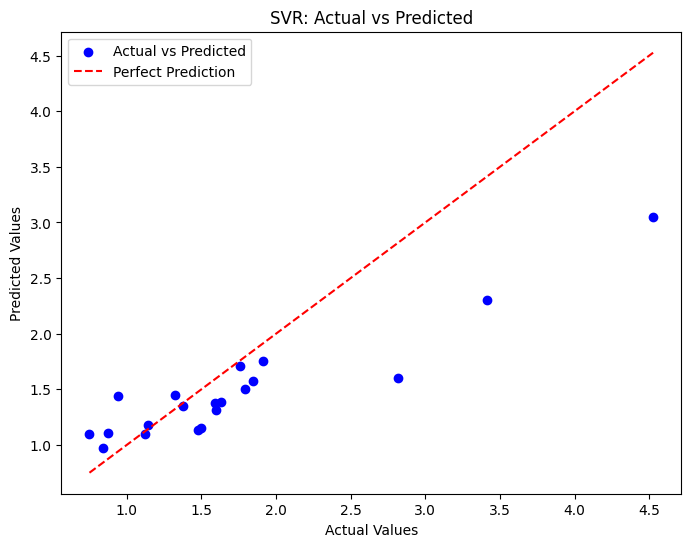

In [ ]:
# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## **AutoRegressive Integrated Moving Average (ARIMA)**

ARIMA merupakan singkatan dari **AutoRegressive Integrated Moving Average**, sebuah algoritma peramalan berdasarkan ide bahwa informasi dari nilai-nilai sebelumnya dalam deret waktu dapat digunakan sendiri untuk memprediksi nilai-nilai di masa depan.
- Model-model ARIMA dijelaskan oleh tiga parameter urutan: **(p, d, q)**, di mana,

  -   p adalah urutan dari istilah AR (Autoregressive)
  -   q adalah urutan dari istilah MA (Moving Average)
  -   d adalah jumlah differencing yang diperlukan untuk membuat deret waktu menjadi stasioner

*   **AR(p) Autoregression** – model regresi yang memanfaatkan hubungan dependen antara pengamatan saat ini dengan pengamatan pada periode sebelumnya. Komponen autoregresi (AR(p)) mengacu pada penggunaan nilai-nilai masa lalu dalam persamaan regresi untuk deret waktu.
*   **I(d) Integration**– menggunakan differencing dari pengamatan (mengurangkan sebuah pengamatan dari pengamatan pada langkah waktu sebelumnya) untuk membuat deret waktu menjadi stasioner. Differencing melibatkan pengurangan nilai-nilai saat ini dari sebuah deret dengan nilai-nilai sebelumnya sebanyak d kali.
*   **MA(q) Moving Average** adalah suatu cara untuk membuat model yang memperhitungkan hubungan antara pengamatan saat ini dengan kesalahan prediksi sebelumnya Jadi, angka 'q' di sini adalah banyaknya kesalahan prediksi sebelumnya yang kita masukkan ke dalam perhitungan model. Semakin besar nilai 'q', semakin banyak kita mempertimbangkan kesalahan-kesalahan sebelumnya dalam membuat prediksi..



















**Auto Regression**

![AR](https://i.postimg.cc/nL8yv7Dr/image.png)

Types of ARIMA Model

1.   **ARIMA** : Non-seasonal Autoregressive Integrated Moving Averages
2.   **SARIMA**: Seasonal ARIMA
3.   **SARIMAX** : Seasonal ARIMA with exogenous variables


**AR model**

![AR Model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png?ezimgfmt=ng:webp/ngcb1)

Di mana,

$Y{t-1}$ adalah lag1 dari seri waktu,

$\beta1$ adalah koefisien lag1 yang diestimasi oleh model, dan

$\alpha$ adalah istilah intercept, juga diestimasi oleh model.

**MA model**

![MA Model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png?ezimgfmt=ng:webp/ngcb1)


**ARIMA**

Model ARIMA adalah model di mana seri waktu di-differencing setidaknya satu kali untuk membuatnya stasioner, dan kita menggabungkan istilah AR dan MA. Jadi, persamaan model ARIMA menjadi:

![Arima model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min-865x77.png?ezimgfmt=ng:webp/ngcb1)

Prediksi Yt = Konstan + Kombinasi Linier Lags dari Y (hingga p lags) + Kombinasi Linier Kesalahan Prediksi Terdahulu (hingga q lags)

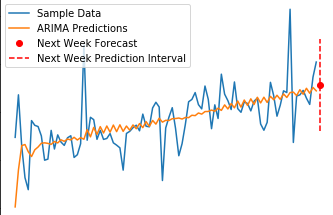




### Import Library, Load, and Plot Data

In [ ]:
#!pip install pandas
#!pip install matplotlib
#!pip install numpy
#!pip install statsmodels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Air_passengers.csv to Air_passengers.csv


In [ ]:
# Read Data
data = pd.read_csv('Air_passengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
#Import time series : Airline passenger traffic
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


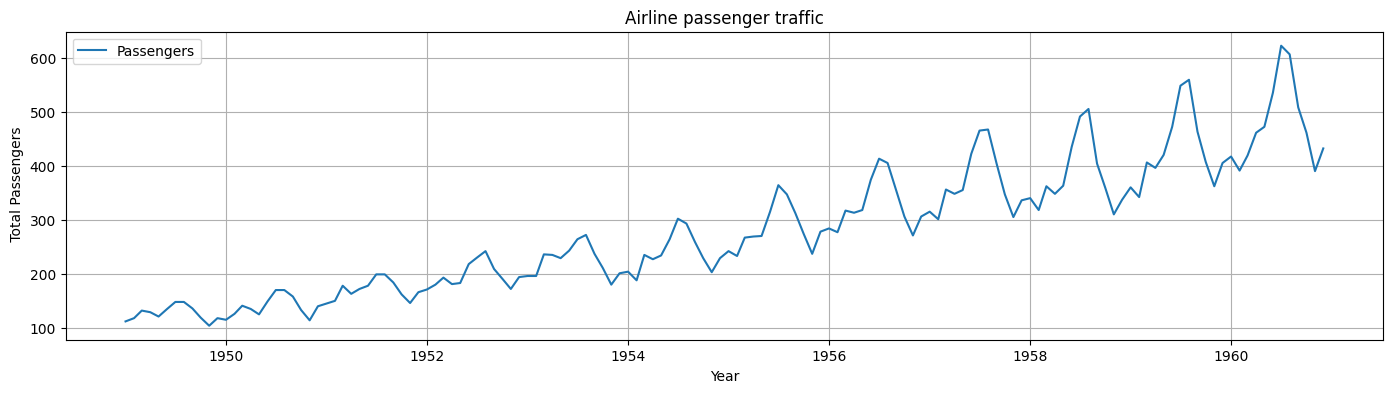

In [ ]:
# Plot the time series
plt.figure(figsize=(17, 4))
plt.plot(data, label='Passengers')  # Add a label for the legend
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Passengers")
plt.legend()
plt.title('Airline passenger traffic')
plt.show()

### Check Stationarity

Pertama, akan diperiksa apakah seri ini stasioner menggunakan uji **Augmented Dickey Fuller (ADF Test)** dari paket statsmodels. Alasannya adalah kita hanya perlu melakukan differencing jika seri tersebut tidak stasioner. Jika stasioner, tidak perlu differencing, artinya d=0. Null Hypothesis (H0) dari uji ADF adalah bahwa seri waktu tidak stasioner.

Jadi, jika nilai p dari uji tersebut kurang dari tingkat signifikansi (0.05),
maka kita menolak hipotesis nol dan menyimpulkan bahwa seri waktu memang stasioner.Jadi, dalam kasus kita, jika Nilai P > 0.05, kita melanjutkan untuk menemukan urutan differencing.

- H0 = Seri waktu Tidak Stasioner
- p < 0.05 = Tolak H0 = Data Stasioner
- p >= 0.05 = Terima H0 = Data Tidak Stasioner

In [ ]:
# Fungsi test ADF
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, Data is non-stationary ")

In [ ]:
print(adfuller(data['Passengers']))

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [ ]:
# hasil test ADF
adf_test(data['Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, Data is non-stationary 


### Differencing

![Diff](https://i.postimg.cc/1zqNdxXM/image.png)

In [ ]:
# Differencing 1st
data['Passengers_1st_diff'] = data['Passengers'] - data['Passengers'].shift(1)

In [ ]:
data['Passengers'].shift(1)

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: Passengers, Length: 144, dtype: float64

In [ ]:
data.head()

,Passengers,Passengers_1st_diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [ ]:
# Check 1st Differencing
adf_test(data['Passengers_1st_diff'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, Data is non-stationary 


In [ ]:
# Differencing 2nd
data['Passengers_2nd_diff'] = data['Passengers_1st_diff'] - data['Passengers_1st_diff'].shift(1)

In [ ]:
data['Passengers_1st_diff'].shift(1)

Month
1949-01-01     NaN
1949-02-01     NaN
1949-03-01     6.0
1949-04-01    14.0
1949-05-01    -3.0
              ... 
1960-08-01    87.0
1960-09-01   -16.0
1960-10-01   -98.0
1960-11-01   -47.0
1960-12-01   -71.0
Name: Passengers_1st_diff, Length: 144, dtype: float64

In [ ]:
data.head()

,Passengers,Passengers_1st_diff,Passengers_2nd_diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [ ]:
#Check 2nd Differencing
adf_test(data['Passengers_2nd_diff'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


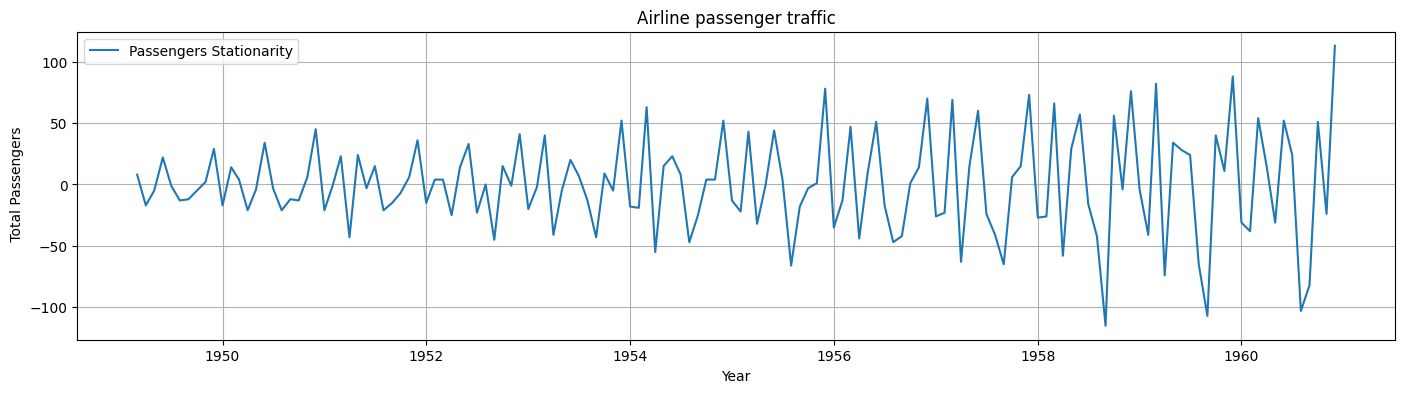

In [ ]:
# Plot the time series
plt.figure(figsize=(17, 4))
plt.plot(data['Passengers_2nd_diff'], label='Passengers Stationarity')  # Add a label for the legend
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Passengers")
plt.legend()
plt.title('Airline passenger traffic')
plt.show()

### PACF and ACF Plot

PACF and ACF explanation
![PACFACF](https://i.postimg.cc/h4zTzdcN/image.png)

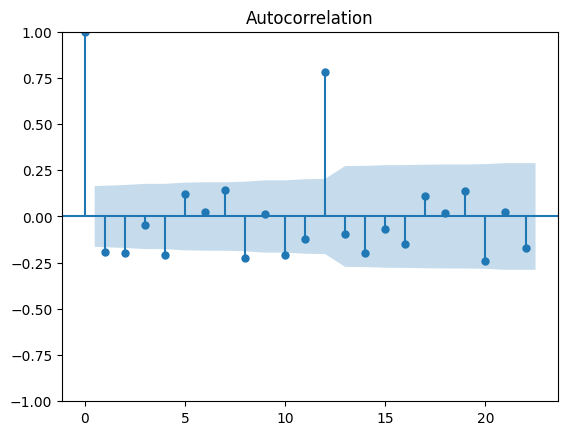

In [ ]:
# Plot ACF
acf = plot_acf(data['Passengers_2nd_diff'].dropna())

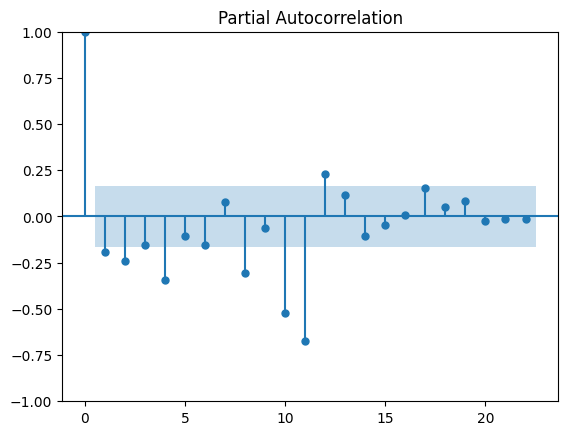

In [ ]:
# Plot PACF
pacf = plot_pacf(data['Passengers_2nd_diff'].dropna())

### Training Models

In [ ]:
# Split dataset
train_len = 120
train_data = data[0:train_len]
test_data = data[train_len:]

In [ ]:
# Determine Prediction start and end date
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
train_data

,Passengers,Passengers_1st_diff,Passengers_2nd_diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
...,...,...,...
1958-08-01,505,14.0,-42.0
1958-09-01,404,-101.0,-115.0
1958-10-01,359,-45.0,56.0


In [ ]:
# ARIMA Modelling
model_ARIMA=ARIMA(train_data['Passengers'],order=(12,2,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Fit Model
model_Arima_fit=model_ARIMA.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# ARIMA Summary
print(model_Arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  120
Model:                ARIMA(15, 2, 0)   Log Likelihood                -463.836
Date:                Wed, 29 Nov 2023   AIC                            959.671
Time:                        01:21:53   BIC                           1004.002
Sample:                    01-01-1949   HQIC                           977.671
                         - 12-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8602      0.128     -6.732      0.000      -1.111      -0.610
ar.L2         -0.5668      0.187     -3.029      0.002      -0.934      -0.200
ar.L3         -0.3663      0.200     -1.828      0.0

In [ ]:
# Forecasting
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)

In [ ]:
# Add Predicted ARIMA data
test_data['Predicted_ARIMA']=pred

<ipython-input-58-45e3ba4fff4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


In [ ]:
test_data

,Passengers,Passengers_1st_diff,Passengers_2nd_diff,PMD_Arima,Predicted_ARIMA
Month,,,,,
1959-01-01,360,23.0,-4.0,387.460078,331.299126
1959-02-01,342,-18.0,-41.0,396.428350,300.242375
1959-03-01,406,64.0,82.0,417.976734,337.777824
1959-04-01,396,-10.0,-74.0,402.196135,314.094093
1959-05-01,420,24.0,34.0,393.626090,334.277346
1959-06-01,472,52.0,28.0,390.868791,394.067205
1959-07-01,548,76.0,24.0,374.582326,453.189327
1959-08-01,559,11.0,-65.0,390.356680,453.299920
1959-09-01,463,-96.0,-107.0,378.885252,359.731027


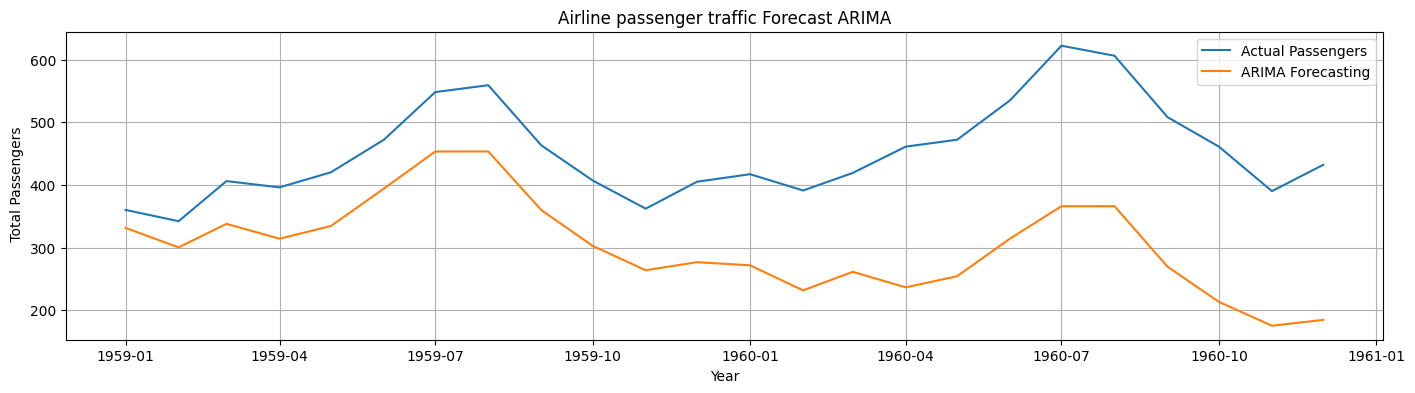

In [ ]:
# Plot the actual vs ARIMA forecasting
plt.figure(figsize=(17, 4))
plt.plot(test_data['Passengers'], label='Actual Passengers')
plt.plot(test_data['Predicted_ARIMA'], label='ARIMA Forecasting')
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Passengers")
plt.legend()
plt.title('Airline passenger traffic Forecast ARIMA')
plt.show()

### PMD ARIMA - Auto Parameter Arima

Dalam Python, paket pmdarima menyediakan fungsi **auto_arima()** yang dapat digunakan untuk mengotomatisasi proses ARIMA Forecasting di **Python.auto_arima()**

menggunakan pendekatan stepwise untuk mencari berbagai kombinasi parameter p, d, q dan memilih model terbaik yang memiliki nilai AIC paling rendah.

**AIC, atau Akaike Information Criterion**, adalah suatu metrik yang digunakan untuk membandingkan kualitas relatif dari model statistik. Nilai AIC diperoleh dari perbandingan antara kesesuaian model dengan data dan kompleksitas model. Semakin rendah nilai AIC, semakin baik model

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.1 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

model = pm.auto_arima(data['Passengers'], start_p=1, start_q=1 ,
                      suppress_warnings=True,
                      trace=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [ ]:
model_pmdArima=ARIMA(train_data['Passengers'],order=(4,1,3))
model_pmdArima_fit=model_pmdArima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
pred=model_pmdArima_fit.predict(start=pred_start_date,end=pred_end_date)
test_data['PMD_Arima'] = pred

<ipython-input-30-b1474064c026>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['PMD_Arima'] = pred


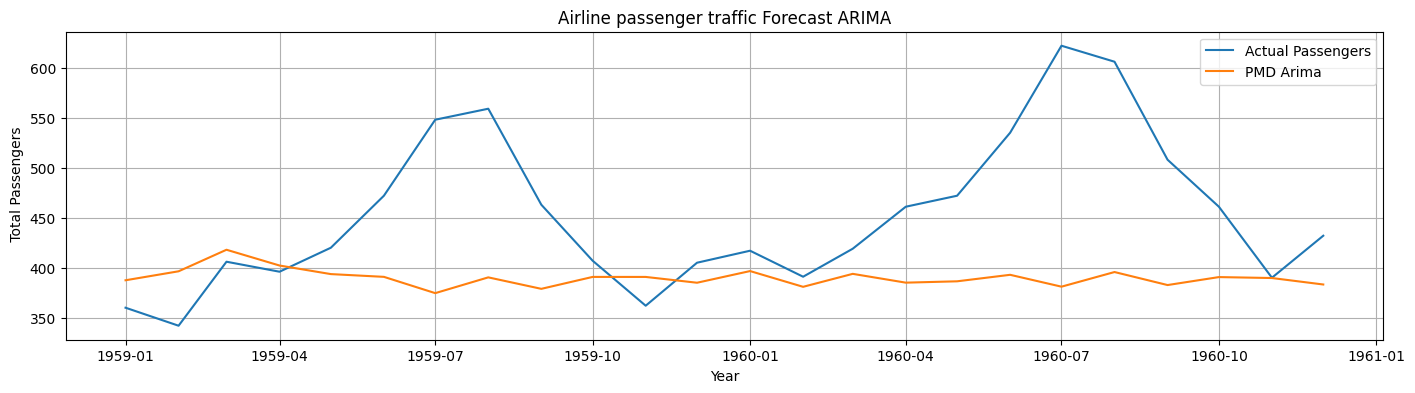

In [ ]:
# Plot the time series DMA
plt.figure(figsize=(17, 4))
plt.plot(test_data['Passengers'], label='Actual Passengers')
plt.plot(test_data['Predicted_ARIMA'], label='Arima Forecast')
plt.plot(test_data['PMD_Arima'], label='PMD Arima')
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Passengers")
plt.legend()
plt.title('Airline passenger traffic Forecast ARIMA')
plt.show()

In [ ]:
#Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error
rmse_manual_arima = np.sqrt(mean_squared_error(test_data['Passengers'], test_data['Predicted_ARIMA'])).round(2)
mape_manual_arima  = np.round(np.mean(np.abs(test_data['Passengers']- test_data['Predicted_ARIMA'])/test_data['Passengers'])*100,2)

rmse_pmd_arima = np.sqrt(mean_squared_error(test_data['Passengers'], test_data['PMD_Arima'])).round(2)
mape_pmd_arima  = np.round(np.mean(np.abs(test_data['Passengers']- test_data['PMD_Arima'])/test_data['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Manual ARIMA', 'PMD ARIMA'], 'MAPE': [mape_manual_arima,mape_pmd_arima ], 'RMSE': [rmse_manual_arima, rmse_pmd_arima]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Manual ARIMA,77.77,15.54
1,PMD ARIMA,99.59,14.49
